## Get Data

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
#Melihat Jumlah data traning dan testing
print('total diabetes training images :', len(os.listdir('Data_Kurangi_Filter/Training/diabetes')))
print('total non diabetes training images :', len(os.listdir('Data_Kurangi_Filter/Training/non_diabetes')))
print('total diabetes testing images :', len(os.listdir('Data_Kurangi_Filter/Testing/diabetes')))
print('total non diabetes testing images :', len(os.listdir('Data_Kurangi_Filter/Testing/non_diabetes')))

total diabetes training images : 198
total non diabetes training images : 134
total diabetes testing images : 65
total non diabetes testing images : 38


In [3]:
# Membuat Path Data Traning dan data testing kedalam variabel
train_dir = os.path.join('Data_Kurangi_Filter/Training')
testing_dir = os.path.join('Data_Kurangi_Filter/Testing')

In [4]:
# Membuat array berisi nama class
class_names = ['Diabetic', 'Normal']
print(class_names)

['Diabetic', 'Normal']


## Preprocessing

In [5]:
# Augmentasi Gambar dengan imagedatagenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.3,
    shear_range=0.2,
    # catatan bagian dibawah ini memndakan data traning kan diambil sebesar 10 % datanya menjadi data validasi
    validation_split=0.1) # set validation split

In [6]:
# Augmentasi data traning
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    subset='training') # set as training data

Found 300 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'diabetes': 0, 'non_diabetes': 1}

In [8]:
# Augmentasi Data Validasi
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 32 images belonging to 2 classes.


In [9]:
validation_generator.class_indices

{'diabetes': 0, 'non_diabetes': 1}

## CNN Model

In [10]:
# Pembuatan model CNN
model = Sequential()
model.add(Conv2D(64,input_shape=(150,150,3),kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0

In [12]:
# Model Optimizer
model.compile(loss='binary_crossentropy',optimizer=tf.optimizers.Adamax(learning_rate=0.001),metrics=['accuracy'])

In [13]:
# Traning model
epoch = 150
history = model.fit(train_generator,validation_data=validation_generator,epochs=epoch,verbose=2,steps_per_epoch=50,validation_steps=5)

Epoch 1/150
50/50 - 28s - loss: 0.7060 - accuracy: 0.5850 - val_loss: 0.6686 - val_accuracy: 0.6000
Epoch 2/150
50/50 - 23s - loss: 0.6823 - accuracy: 0.5950 - val_loss: 0.6837 - val_accuracy: 0.6000
Epoch 3/150
50/50 - 22s - loss: 0.6804 - accuracy: 0.5850 - val_loss: 0.6783 - val_accuracy: 0.6000
Epoch 4/150
50/50 - 20s - loss: 0.6844 - accuracy: 0.5350 - val_loss: 0.7039 - val_accuracy: 0.5000
Epoch 5/150
50/50 - 21s - loss: 0.6777 - accuracy: 0.6050 - val_loss: 0.6606 - val_accuracy: 0.6500
Epoch 6/150
50/50 - 21s - loss: 0.6785 - accuracy: 0.5950 - val_loss: 0.6663 - val_accuracy: 0.6000
Epoch 7/150
50/50 - 20s - loss: 0.6713 - accuracy: 0.6000 - val_loss: 0.6649 - val_accuracy: 0.6000
Epoch 8/150
50/50 - 20s - loss: 0.6545 - accuracy: 0.6450 - val_loss: 0.6809 - val_accuracy: 0.5000
Epoch 9/150
50/50 - 21s - loss: 0.6448 - accuracy: 0.6300 - val_loss: 0.5929 - val_accuracy: 0.7000
Epoch 10/150
50/50 - 22s - loss: 0.6038 - accuracy: 0.7300 - val_loss: 0.5862 - val_accuracy: 0.7000

Epoch 83/150
50/50 - 20s - loss: 0.4010 - accuracy: 0.8200 - val_loss: 0.8206 - val_accuracy: 0.6500
Epoch 84/150
50/50 - 21s - loss: 0.3386 - accuracy: 0.8600 - val_loss: 0.4885 - val_accuracy: 0.8500
Epoch 85/150
50/50 - 21s - loss: 0.3047 - accuracy: 0.8700 - val_loss: 0.6621 - val_accuracy: 0.6000
Epoch 86/150
50/50 - 20s - loss: 0.3603 - accuracy: 0.8500 - val_loss: 0.6875 - val_accuracy: 0.7000
Epoch 87/150
50/50 - 20s - loss: 0.3405 - accuracy: 0.8550 - val_loss: 0.7267 - val_accuracy: 0.6500
Epoch 88/150
50/50 - 21s - loss: 0.3373 - accuracy: 0.8500 - val_loss: 0.7178 - val_accuracy: 0.7500
Epoch 89/150
50/50 - 21s - loss: 0.3609 - accuracy: 0.8300 - val_loss: 0.8060 - val_accuracy: 0.7000
Epoch 90/150
50/50 - 21s - loss: 0.3064 - accuracy: 0.8600 - val_loss: 1.1494 - val_accuracy: 0.6000
Epoch 91/150
50/50 - 20s - loss: 0.3655 - accuracy: 0.8250 - val_loss: 0.4191 - val_accuracy: 0.8000
Epoch 92/150
50/50 - 20s - loss: 0.3237 - accuracy: 0.8500 - val_loss: 0.5220 - val_accurac

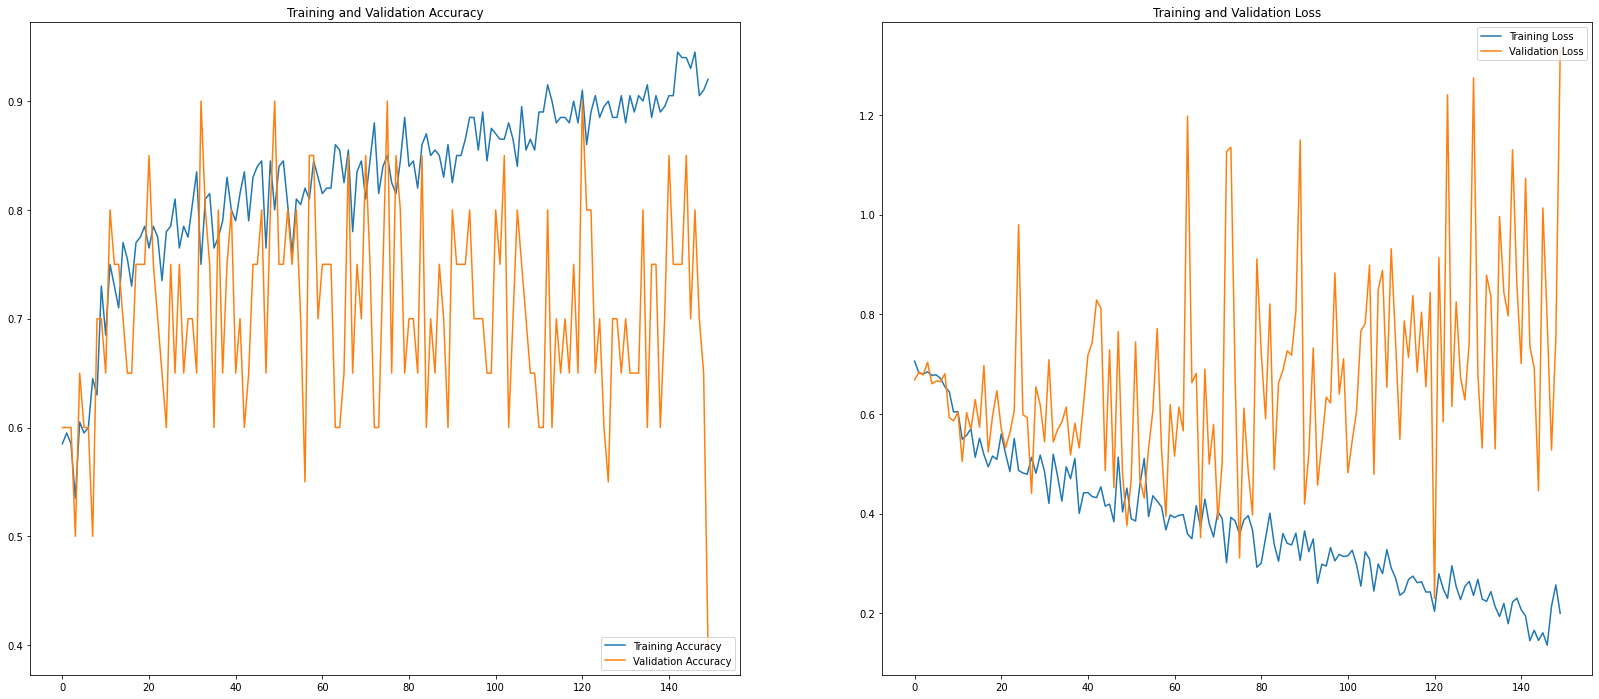

In [14]:
# Plot hasil Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(28, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Prediction

This image most likely belongs to Diabetic with a 73.11 percent confidence.


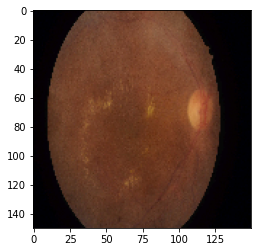

In [16]:
# Membuat prediksi
import keras
IMG_SIZE = 512

# Ambil data untuk di redict
Pred_Path = "Testing/diabetes/IDRiD_017.jpg"
Pred_result_Path = "Prediksi.png"

# Proses data yang akan di diprediksi
img = cv2.imread(Pred_Path)
img_process = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_process = cv2.resize(img_process, (IMG_SIZE, IMG_SIZE))
img_process = cv2.addWeighted(img_process,4, cv2.GaussianBlur(img_process , (0,0) , 40) ,-4 ,128)
cv2.imwrite(Pred_result_Path, img_process)

import keras

# Catatan Image Input yang diupload akan di proses terlebih dahulu agar sesuai dengan traning model"
# Sehingga pada saat predict gambar yang digunakan adalah file gambar upload yang telah di proses"

#Load Image Process dan bentuk kedalam array
img_plot = keras.preprocessing.image.load_img(Pred_Path, target_size=(150, 150))
img_pred = keras.preprocessing.image.load_img(Pred_result_Path, target_size=(150, 150))
img_array = keras.preprocessing.image.img_to_array(img_pred)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# Prediksi hasil klassifikasi
predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
imgplot = plt.imshow(img_plot)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

## Accuracy Check

In [17]:
Testing_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
test_generator = Testing_datagen.flow_from_directory(
    testing_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical') # set as training data

Found 103 images belonging to 2 classes.


In [19]:
test_accu = model.evaluate(test_generator)
print('The testing accuracy is :',test_accu[1]*100, '%')

26/26 [==============================] - 3s 110ms/step - loss: 0.9762 - accuracy: 0.6893
The testing accuracy is : 68.93203854560852 %


## Save Model

In [ ]:
# Save Model kedalam format h5
model.save('GUI/ModelML/ModelDR.h5')

In [ ]:
# Load Model untuk dicoba
new_model = tf.keras.models.load_model('GUI/ModelML/ModelDR.h5')

# Show the model architecture
new_model.summary()

In [ ]:
test_accu = new_model.evaluate(test_generator)
print('The testing accuracy is :',test_accu[1]*100, '%')